<a href="https://colab.research.google.com/github/Ananth-9/Ananth-9/blob/main/wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'global-wine-ratings-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5430809%2F9013419%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240823%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240823T120708Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0279dfd447d2ce3a4cba4a94e6e6d842affb325c340f20ae6e425eaccfad0c4bd51f30f10ae25ace6c22d8b968cb0a919406601141c4cb2c65c98632004141daa14afba8c7445d37a4b3ff6d6fd270d857ccbf224d40dd6e917976275753deaefb9633cc4b9b4689fb4654c4bc1498fddbece4546b2b9b04495405c2d9a9e07aebdfd4ea9c3c12f919281429d517c76ab2598cb10e3396f74d0be5761b6dc106f3cd4ac5bac519e5a187a4ce6852038db625dcc167897cb2793ed4fed47fc15f717bbad44b9f92a551e195daa471d33480c73af08da6d8c320044f3852d820d54f88a4c8b78a7c78a935c24c738f51b7bbdc9ed339c56e2f25eeaac06789c9bb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3149758 bytes downloaded
Downloaded and uncompressed: global-wine-ratings-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-wine-ratings-dataset/wine-raitngs.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [4]:
pd.set_option('max_colwidth',None)

In [5]:
df = pd.read_csv('/kaggle/input/global-wine-ratings-dataset/wine-raitngs.csv')

In [6]:
df.head()

,name,region,variety,rating,notes
0,1000 Stories Bourbon Barrel Aged Batch Blue Carignan 2016,"Mendocino, California",Red Wine,91,"This is a very special, limited release of 1000 Stories Bourbon Barrel-Aged Carignan, their first-ever release of Carignan as a single varietal. Classic and rustic with a little edge. Look for notes of brilliantly racy red and black fruits set to a rich backdrop of toast, herbs, and cocoa."
1,1000 Stories Bourbon Barrel Aged Gold Rush Red 2016,California,Red Wine,89,"The California Gold Rush was a period of courage, bravado and curiosity. It was with these characteristics in mind that we crafted Gold Rush Red. Grapes chosen from the golden hills and valleys of California were blended to create this bold, adventurous testament to that intrepid spirit."
2,1000 Stories Bourbon Barrel Aged Gold Rush Red 2017,California,Red Wine,90,"The California Gold Rush was a period of courage, bravado and curiosity. Gold Rush is crafted with these characteristics in mind. The grapes used to blend this bold wine are carefully selected from golden hills and valleys of California. It is finished in bourbon barrels, which complements this rich wine with notes of charred vanilla and dried herbs."
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,"North Coast, California",Red Wine,91,"The wine has a deep, rich purple color. An intense raspberry fruit is on the nose, with black pepper spice and a touch of cloves and dried herbs. The palate is full with ripe tannins, big black and red fruits, followed by an array of spices. The wine finishes with a touch of warmth that lingers on and on."
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,California,Red Wine,90,"Batch #004 is the first release of the 2014 vintage and once againMendocino Zinfandel plays a big role in the blend with classic oldvineyards such as Sargentini and Rucker vineyards. Head trained and dry farmed, these vineyards give nice raspberry fruits. Dry Creek Valley Zinfandel also makes a big impact on the blend in Batch #004. Dry Creek is a classic and well known source for great Zinfandel and has added a new dimension to the 1000 Stories blend. Black fruits with distinct notes of black pepper and even a bit of clove spice add complexity to the blend. Also new to this batch is the addition of Lodi Zinfandel, with its iconic bold flavors and big character. Rounding out the blend are some Zinfandels from Colusa County, Syrah from Paso Robles and Petite sirah from Mendocino. A portion of the wine is aged in French and American oak for 6 months and then aged further in bourbon barrels. We’ve selected new and used bourbon barrels for these small batches of Zinfandel, which impart characteristics specific to these barrels: charred vanilla, dried herbs and a hint of caramel."


In [7]:
df['variety'].value_counts()

,count
variety,
Red Wine,23491
White Wine,7494
Sparkling & Champagne,855
Pink and Rosé,496
Collectible,220
Green Wine,27
Boutique,26
Screw Cap,12


<Axes: xlabel='rating', ylabel='Density'>

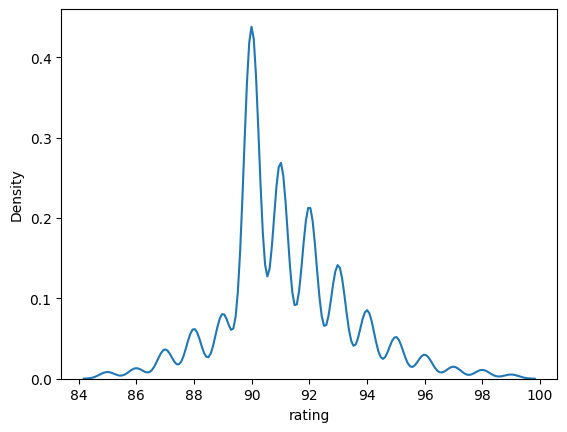

In [8]:
sns.kdeplot(data=df,x='rating')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


<Axes: ylabel='rating'>

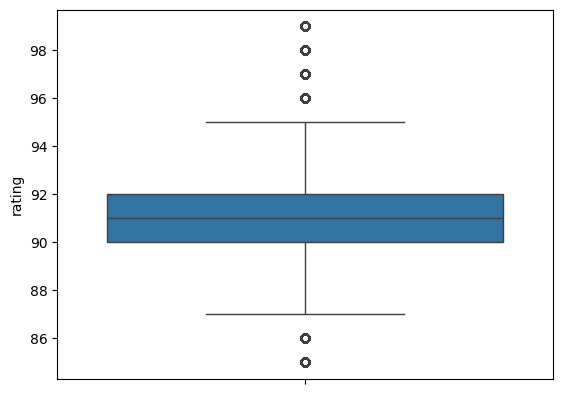

In [9]:
sns.boxplot(data=df,y='rating',orient='h')

In [10]:
df.shape

(32980, 5)

In [11]:
df.head()

,name,region,variety,rating,notes
0,1000 Stories Bourbon Barrel Aged Batch Blue Carignan 2016,"Mendocino, California",Red Wine,91,"This is a very special, limited release of 1000 Stories Bourbon Barrel-Aged Carignan, their first-ever release of Carignan as a single varietal. Classic and rustic with a little edge. Look for notes of brilliantly racy red and black fruits set to a rich backdrop of toast, herbs, and cocoa."
1,1000 Stories Bourbon Barrel Aged Gold Rush Red 2016,California,Red Wine,89,"The California Gold Rush was a period of courage, bravado and curiosity. It was with these characteristics in mind that we crafted Gold Rush Red. Grapes chosen from the golden hills and valleys of California were blended to create this bold, adventurous testament to that intrepid spirit."
2,1000 Stories Bourbon Barrel Aged Gold Rush Red 2017,California,Red Wine,90,"The California Gold Rush was a period of courage, bravado and curiosity. Gold Rush is crafted with these characteristics in mind. The grapes used to blend this bold wine are carefully selected from golden hills and valleys of California. It is finished in bourbon barrels, which complements this rich wine with notes of charred vanilla and dried herbs."
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,"North Coast, California",Red Wine,91,"The wine has a deep, rich purple color. An intense raspberry fruit is on the nose, with black pepper spice and a touch of cloves and dried herbs. The palate is full with ripe tannins, big black and red fruits, followed by an array of spices. The wine finishes with a touch of warmth that lingers on and on."
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,California,Red Wine,90,"Batch #004 is the first release of the 2014 vintage and once againMendocino Zinfandel plays a big role in the blend with classic oldvineyards such as Sargentini and Rucker vineyards. Head trained and dry farmed, these vineyards give nice raspberry fruits. Dry Creek Valley Zinfandel also makes a big impact on the blend in Batch #004. Dry Creek is a classic and well known source for great Zinfandel and has added a new dimension to the 1000 Stories blend. Black fruits with distinct notes of black pepper and even a bit of clove spice add complexity to the blend. Also new to this batch is the addition of Lodi Zinfandel, with its iconic bold flavors and big character. Rounding out the blend are some Zinfandels from Colusa County, Syrah from Paso Robles and Petite sirah from Mendocino. A portion of the wine is aged in French and American oak for 6 months and then aged further in bourbon barrels. We’ve selected new and used bourbon barrels for these small batches of Zinfandel, which impart characteristics specific to these barrels: charred vanilla, dried herbs and a hint of caramel."


In [12]:
df.isna().sum()

,0
name,0
region,3
variety,359
rating,0
notes,0


In [13]:
df['variety'].value_counts()

,count
variety,
Red Wine,23491
White Wine,7494
Sparkling & Champagne,855
Pink and Rosé,496
Collectible,220
Green Wine,27
Boutique,26
Screw Cap,12


In [14]:
df[df.isna().any(axis=1)]

,name,region,variety,rating,notes
271,Achaia Clauss Mavrodaphne,Greece,NaN,88,"A full-bodied red dessert wine that dates back to 1854, Mavrodaphne has a rich yet delicate taste and a Port style aroma with hints of coffee, toffee and rich, spicy nuts. Refined raisin and black cherry fruit flavors are layered with smoky, caramel tones."
1301,Alvaro Domecq Alburejo Oloroso,Spain,NaN,92,"This wine has a dark mahogany color with shades of amber; it is clean and bright. It has a great aromatic intensity with aromas of nuts and almonds, deep notes of wood and vanilla, which are typical of a long ageing period. It is a dry and biting wine on the palate, warm and velvety, presenting nuances of nuts and wood with a great persistence and long aftertaste."
1307,Alvaro Palacios Les Terrasses Priorat 2003,NaN,Red Wine,90,"""A great introduction to Palacios' style, is the 2003 Les Terrasses, a blend of 60% Grenache, 30% Carignan, and 10% Cabernet Sauvignon. A beautiful wine aged 12 months in primarily French, and some American oak, it is a supple-textured, sexy, seductive, deep ruby/purple-tinged offering exhibiting ripe notes of black cherries, currants, licorice, and minerals. Opulent, round, juicy, and alluring, it will drink well for 4-6 years."""
1313,Alvear Fino En Rama 2012,Spain,NaN,91,"""En Rama"" means that it is unblended and has not been stabilized and only lightly filtered to enhance its individuality. This is a unique product, the first ever made ""single vintage"" Fino in modern history."
1314,Alvear Fino En Rama (500ML) 2004,Spain,NaN,90,"Pale pasta color with yeast and heavy paint thinner on the nose. Green olive, paint thinner and sour apple on the thin mid-palate disappears quickly before a long delayed bread and almond finish emerges. Extremely dry. This is the first-ever-made single vintage Fino. It was aged for 2 years in traditional American oak barrels"
...,...,...,...,...,...
30990,La Cigarrera Pasada Manzanilla Sherry (375ml half-bottle),"Jerez, Spain",NaN,93,"This rare, biologically-aged sherry is a briny treat. The expressive nose displays dried herbs, hazelnuts, and sesame seeds. Sea foam freshness is beautifully interwoven with crystalline notes. The finish is focused yet long-lasting."
32254,Le Salette Amarone della Valpolicella Pergole Vece Recioto (500ML) 2011,"Valpolicella, Veneto, Italy",NaN,93,"Ruby red with cyclamen accents. Dry fruit, forest floor with blueberry and violets gives way to hints of blackberry jam, cacao and tamarind syrup on the nose. Delicately sweet with balanced tannins, deftly balances sugar and acidity which gives a long finish while maintaining its freshness."
32285,Leacock's 10 Year Bual Madiera,Portugal,NaN,88,"Clear, amber colour with golden highlights. A complex and intense aroma of dried fruits (fig, prunes, almonds), toffee and vanilla-spice. Medium sweet, smooth, soft fruit, balanced by a strong backbone of citrus acidity and a luxurious, long finish."
32287,Leacock's Rainwater Madeira,"Madeira, Portugal",NaN,90,"Made from Tinta Negra Mole grapes collected from multiple small, terraced vineyards that cling to the steep mountainous slopes of the island, this is a medium-dry wine combining soft fruit flavors with a dry, nutty quality. The grapes are fermented in stainless steel tanks until a neutral grape spirit brandy is added to stop the fermentation. Following fermentation, the wine undergoes a heating process, estufagem, where it is placed in cask in a special lodge or estufa where it will remain for at least three months. This heating process oxidizes the wine, giving it a very long shelf life and its characteristic nutty, rich flavors."


In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().sum()

,0
name,0
region,0
variety,0
rating,0
notes,0


In [17]:
df.head()

,name,region,variety,rating,notes
0,1000 Stories Bourbon Barrel Aged Batch Blue Carignan 2016,"Mendocino, California",Red Wine,91,"This is a very special, limited release of 1000 Stories Bourbon Barrel-Aged Carignan, their first-ever release of Carignan as a single varietal. Classic and rustic with a little edge. Look for notes of brilliantly racy red and black fruits set to a rich backdrop of toast, herbs, and cocoa."
1,1000 Stories Bourbon Barrel Aged Gold Rush Red 2016,California,Red Wine,89,"The California Gold Rush was a period of courage, bravado and curiosity. It was with these characteristics in mind that we crafted Gold Rush Red. Grapes chosen from the golden hills and valleys of California were blended to create this bold, adventurous testament to that intrepid spirit."
2,1000 Stories Bourbon Barrel Aged Gold Rush Red 2017,California,Red Wine,90,"The California Gold Rush was a period of courage, bravado and curiosity. Gold Rush is crafted with these characteristics in mind. The grapes used to blend this bold wine are carefully selected from golden hills and valleys of California. It is finished in bourbon barrels, which complements this rich wine with notes of charred vanilla and dried herbs."
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,"North Coast, California",Red Wine,91,"The wine has a deep, rich purple color. An intense raspberry fruit is on the nose, with black pepper spice and a touch of cloves and dried herbs. The palate is full with ripe tannins, big black and red fruits, followed by an array of spices. The wine finishes with a touch of warmth that lingers on and on."
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,California,Red Wine,90,"Batch #004 is the first release of the 2014 vintage and once againMendocino Zinfandel plays a big role in the blend with classic oldvineyards such as Sargentini and Rucker vineyards. Head trained and dry farmed, these vineyards give nice raspberry fruits. Dry Creek Valley Zinfandel also makes a big impact on the blend in Batch #004. Dry Creek is a classic and well known source for great Zinfandel and has added a new dimension to the 1000 Stories blend. Black fruits with distinct notes of black pepper and even a bit of clove spice add complexity to the blend. Also new to this batch is the addition of Lodi Zinfandel, with its iconic bold flavors and big character. Rounding out the blend are some Zinfandels from Colusa County, Syrah from Paso Robles and Petite sirah from Mendocino. A portion of the wine is aged in French and American oak for 6 months and then aged further in bourbon barrels. We’ve selected new and used bourbon barrels for these small batches of Zinfandel, which impart characteristics specific to these barrels: charred vanilla, dried herbs and a hint of caramel."


In [18]:
df['region'].unique()

array(['Mendocino, California', 'California', 'North Coast, California',
       'Ribera del Duero, Spain', 'Columbia Valley, Washington',
       'Washington', 'Napa Valley, California',
       'Sonoma Coast, Sonoma County, California', 'Maipo Valley, Chile',
       'Chile', 'Leyda Valley, San Antonio Valley (Chile), Chile',
       'Australia', 'Barossa Valley, Barossa, South Australia, Australia',
       'Marlborough, New Zealand', 'Spain', 'Lodi, California',
       'Pfalz, Germany', 'Valdeorras, Spain', 'Italy',
       'Champagne, France', 'Portugal', 'Oregon',
       'Willamette Valley, Oregon', 'Rogue Valley, Oregon',
       'Santa Barbara, Central Coast, California',
       'Central Coast, California',
       'Amador, Sierra Foothills, California',
       'Santa Ynez Valley, Santa Barbara, Central Coast, California',
       'Paso Robles, Central Coast, California', 'Umpqua Valley, Oregon',
       'Trentino-Alto Adige, Italy',
       'Alto Adige, Trentino-Alto Adige, Italy',
      

In [19]:
df[df['name'].duplicated(keep=False)]

,name,region,variety,rating,notes
162,Abadia Retuerta Seleccion Especial 2000,"Ribera del Duero, Spain",Red Wine,91,"This blend of 75% Tempranillo, 20% Cabernet Sauvignon and 5% Merlot is utterly unique and delicious! Dark, rich, and fruity with velvety tannins and a long finish, for not much money."
675,Albert Bichot Chablis Les Blanchots Domaine Long-Depaquit Grand Cru 2017,"Chablis, Burgundy, France",White Wine,90,"Les Blanchots is remarkably elegant. The nose is dominated by a bouquet of white flowers (Lillies, roses). The mouth is ample and generous with great harmony. The finale is very mineral with discreet hints of sea air and smoke (flint, pencil graphite)."
722,Albino Rocca Barbaresco Ronchi 2011,"Barbaresco, Piedmont, Italy",Red Wine,92,Blend: 100% Nebbiolo
822,Alexandria Nicole Cellars Quarry Butte 2003,"Columbia Valley, Washington",Red Wine,90,"Quarry Butte is an elegantly expressive five varietal blend that packs a punch for the value; capturing the unique terrior of Destiny Ridge Vineyard. Barrel aged in both French and American Oak barrels for 16 months, this blend of 56% Cabernet Sauvignon, 34% Merlot, 4% Syrah, 3% Cabernet Franc, and 3% Malbec is loaded with ripe berry flavors, hints of chocolate, spice and sweet oak that is backed by an elegantly balanced structure and silky smooth finish."
886,Allegrini La Grola 2014,"Veneto, Italy",Red Wine,92,"La Grola is the extraordinary result of the meeting of two great personalities: the hill of La Grola and the Valpolicella’s autochthonous grapes. The excellent exposure of the vineyards, which enjoy the sun’s warm rays and the cool breezes that come from nearby Lake Garda, allows the grapes to produce their very best. Careful, craftsman-like aging in the cellar yields a red wine with great elegance, harmony and finesse that can evolve positively for over a decade."
...,...,...,...,...,...
32975,Byron Chardonnay 2006,"Santa Maria Valley, Central Coast, California",White Wine,88,"Staying true to the consistent nature of Chardonnay from this cool coastal appellation, it combines vibrant fruit character with a rich texture and a silky finish. Aromas of orange blossom, Anjou pear and hazelnut are accented by hints of mineral and toasty oak. On the palate, the wine is well balanced with traces of peach, mandarin orange and toasty brown spice with along, lingering finish."
32976,Booker Vineyard White 2011,"Paso Robles, Central Coast, California",White Wine,92,"The wine starts with honeysuckle and dried peaches, then movesinto a dense mid palate of apples and melons. The finish explodes with vibrant acidity powered by lemon zest and peaches. This wine has so much going on, so many different flavors that you need to experience it for the simple fact you likely haven't tasted anything on the market like it."
32977,Keenan Napa Valley Cabernet Sauvignon (375ML half-bottle) 2010,"Napa Valley, California",Red Wine,91,"The 2010 Cabernet Sauvignon is composed primarily of grapes grown on Keenan's Spring Mountain District Estate. The blend was assembled just before bottling. The Estate grown Cabernet imparts amazing concentration and remarkable structure, while the portion of Cabernet harvested from Pope Valley adds complex aromas and a balanced mid-palate."
32978,Hearst Ranch Randolph 2015,"Paso Robles, Central Coast, California",Red Wine,89,"The 2015 Randolph is a stunning wine as versatile as any we’ve ever bottled. It possesses traits of a wine blessed with both juicy ripeness and composed balance. The nose is jam-packed with lush high-toned cherry supported by toasted oak and vanilla. In the palate, bright acidity in the attack brings forward dark stone fruit flavors of satsuma plum which course through the palate with a creamy, soft texture that lingers into the finish. While this wine will age for years, it is also remarkably drinkable in its youth."


In [20]:
df.drop_duplicates(keep=False,inplace=True)

In [21]:
df

,name,region,variety,rating,notes
0,1000 Stories Bourbon Barrel Aged Batch Blue Carignan 2016,"Mendocino, California",Red Wine,91,"This is a very special, limited release of 1000 Stories Bourbon Barrel-Aged Carignan, their first-ever release of Carignan as a single varietal. Classic and rustic with a little edge. Look for notes of brilliantly racy red and black fruits set to a rich backdrop of toast, herbs, and cocoa."
1,1000 Stories Bourbon Barrel Aged Gold Rush Red 2016,California,Red Wine,89,"The California Gold Rush was a period of courage, bravado and curiosity. It was with these characteristics in mind that we crafted Gold Rush Red. Grapes chosen from the golden hills and valleys of California were blended to create this bold, adventurous testament to that intrepid spirit."
2,1000 Stories Bourbon Barrel Aged Gold Rush Red 2017,California,Red Wine,90,"The California Gold Rush was a period of courage, bravado and curiosity. Gold Rush is crafted with these characteristics in mind. The grapes used to blend this bold wine are carefully selected from golden hills and valleys of California. It is finished in bourbon barrels, which complements this rich wine with notes of charred vanilla and dried herbs."
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,"North Coast, California",Red Wine,91,"The wine has a deep, rich purple color. An intense raspberry fruit is on the nose, with black pepper spice and a touch of cloves and dried herbs. The palate is full with ripe tannins, big black and red fruits, followed by an array of spices. The wine finishes with a touch of warmth that lingers on and on."
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,California,Red Wine,90,"Batch #004 is the first release of the 2014 vintage and once againMendocino Zinfandel plays a big role in the blend with classic oldvineyards such as Sargentini and Rucker vineyards. Head trained and dry farmed, these vineyards give nice raspberry fruits. Dry Creek Valley Zinfandel also makes a big impact on the blend in Batch #004. Dry Creek is a classic and well known source for great Zinfandel and has added a new dimension to the 1000 Stories blend. Black fruits with distinct notes of black pepper and even a bit of clove spice add complexity to the blend. Also new to this batch is the addition of Lodi Zinfandel, with its iconic bold flavors and big character. Rounding out the blend are some Zinfandels from Colusa County, Syrah from Paso Robles and Petite sirah from Mendocino. A portion of the wine is aged in French and American oak for 6 months and then aged further in bourbon barrels. We’ve selected new and used bourbon barrels for these small batches of Zinfandel, which impart characteristics specific to these barrels: charred vanilla, dried herbs and a hint of caramel."
...,...,...,...,...,...
32775,Lewis Cellars Syrah Ethan's Blend 2005,California,Red Wine,92,"Now 7 years old, Alec's younger brother Ethan shows sunny pride in his new Ethan's Syrah, Lewis' first bottling since the 2001 vintage. And like the sunflowers and lavender in France this wine displays true Rhone character. From cooler-climate vines this 100% Syrah blend is infused with smoky fruit, white pepper and wild floral notes. Sweet shadings of violet and bacon frame a pure focused palate, gathering weight and richness in a plush and persistent finish."
32776,Lewis Cellars Syrah Ethan's Blend 2014,California,Red Wine,93,"Born in 2000, everything about Ethan and his new 2014 Syrah sings ""sweet sixteen."" Vivid color and distinctly ripe, youthful Rhone character shines bright with violets, charcuterie, oak and vanilla spices. Sweet blue fruit and silky tannins with a dash of bacon fat create a round, deliciously fresh palate like steam-polished stones."
32777,Lewis Cellars Syrah Ethan's Blend 2009,California,Red Wine,94,"Positioned between brothers, Alec and Mason, Ethan gets a walk-off home run in his first at-bat since the 2005 vintage. At short-stop Ethan sees lots of action and his wine cover

In [22]:
pd.set_option('display.max_rows',None)

In [23]:
df['country'] = df['region'].apply(lambda x: x.split(',')[-1]).str.strip()

In [24]:
df.head()

,name,region,variety,rating,notes,country
0,1000 Stories Bourbon Barrel Aged Batch Blue Carignan 2016,"Mendocino, California",Red Wine,91,"This is a very special, limited release of 1000 Stories Bourbon Barrel-Aged Carignan, their first-ever release of Carignan as a single varietal. Classic and rustic with a little edge. Look for notes of brilliantly racy red and black fruits set to a rich backdrop of toast, herbs, and cocoa.",California
1,1000 Stories Bourbon Barrel Aged Gold Rush Red 2016,California,Red Wine,89,"The California Gold Rush was a period of courage, bravado and curiosity. It was with these characteristics in mind that we crafted Gold Rush Red. Grapes chosen from the golden hills and valleys of California were blended to create this bold, adventurous testament to that intrepid spirit.",California
2,1000 Stories Bourbon Barrel Aged Gold Rush Red 2017,California,Red Wine,90,"The California Gold Rush was a period of courage, bravado and curiosity. Gold Rush is crafted with these characteristics in mind. The grapes used to blend this bold wine are carefully selected from golden hills and valleys of California. It is finished in bourbon barrels, which complements this rich wine with notes of charred vanilla and dried herbs.",California
3,1000 Stories Bourbon Barrel Aged Zinfandel 2013,"North Coast, California",Red Wine,91,"The wine has a deep, rich purple color. An intense raspberry fruit is on the nose, with black pepper spice and a touch of cloves and dried herbs. The palate is full with ripe tannins, big black and red fruits, followed by an array of spices. The wine finishes with a touch of warmth that lingers on and on.",California
4,1000 Stories Bourbon Barrel Aged Zinfandel 2014,California,Red Wine,90,"Batch #004 is the first release of the 2014 vintage and once againMendocino Zinfandel plays a big role in the blend with classic oldvineyards such as Sargentini and Rucker vineyards. Head trained and dry farmed, these vineyards give nice raspberry fruits. Dry Creek Valley Zinfandel also makes a big impact on the blend in Batch #004. Dry Creek is a classic and well known source for great Zinfandel and has added a new dimension to the 1000 Stories blend. Black fruits with distinct notes of black pepper and even a bit of clove spice add complexity to the blend. Also new to this batch is the addition of Lodi Zinfandel, with its iconic bold flavors and big character. Rounding out the blend are some Zinfandels from Colusa County, Syrah from Paso Robles and Petite sirah from Mendocino. A portion of the wine is aged in French and American oak for 6 months and then aged further in bourbon barrels. We’ve selected new and used bourbon barrels for these small batches of Zinfandel, which impart characteristics specific to these barrels: charred vanilla, dried herbs and a hint of caramel.",California


In [25]:
df.rename(columns={'country':'place'},inplace=True)

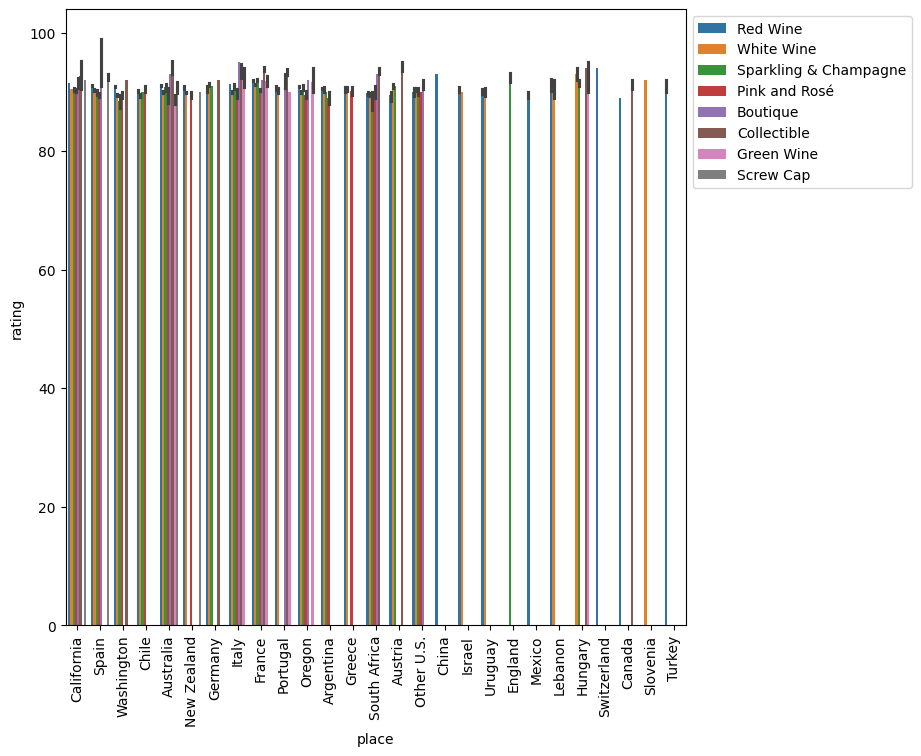

In [26]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='place',y='rating',hue='variety')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [30]:
df.groupby(['place','variety'])['rating'].sum()

place         variety              
Argentina     Pink and Rosé               534
              Red Wine                  80975
              Sparkling & Champagne       180
              White Wine                 9672
Australia     Boutique                     93
              Collectible                 376
              Green Wine                  354
              Pink and Rosé               536
              Red Wine                 117265
              Screw Cap                   635
              Sparkling & Champagne       454
              White Wine                29432
Austria       Collectible                2264
              Red Wine                    358
              Sparkling & Champagne        91
              White Wine                 7190
California    Boutique                    549
              Collectible                 556
              Pink and Rosé             10917
              Red Wine                 667734
              Screw Cap                    92
              Sparkling & Champagne     14388
              White Wine               238925
Canada        Collectible                1004
              Red Wine                     89
Chile         Pink and Rosé               271
              Red Wine                  49230
              Sparkling & Champagne        90
              White Wine                12880
China         Red Wine                     93
England       Sparkling & Champagne      1295
France        Boutique                     92
              Collectible                9200
              Green Wine                 1010
              Pink and Rosé             25473
              Red Wine                 499472
              Sparkling & Champagne     43063
              White Wine               138769
Germany       Collectible                  92
              Red Wine                    271
              Sparkling & Champagne        91
              White Wine                28747
Greece        Pink and Rosé               811
              Red Wine                   3073
              White Wine                 7421
Hungary       Collectible                  94
              Green Wine                  185
              Sparkling & Champagne       183
              White Wine                  186
Israel        Red Wine                   2442
              White Wine                   90
Italy         Boutique                     95
              Collectible                 561
              Green Wine                  462
              Pink and Rosé              1346
              Red Wine                 319410
              Sparkling & Champagne      6634
              White Wine                40226
Lebanon       Red Wine                    456
              White Wine                  270
Mexico        Red Wine                    179
New Zealand   Pink and Rosé               179
              Red Wine                  17522
              Screw Cap                    90
              White Wine                34614
Oregon        Boutique                     92
              Green Wine                  275
              Pink and Rosé              1164
              Red Wine                  84040
              Sparkling & Champagne      3539
              White Wine                36721
Other U.S.    Boutique                    365
              Pink and Rosé                90
              Red Wine                   1801
              Sparkling & Champagne       990
              White Wine                 6425
Portugal      Boutique                    827
              Collectible                5792
              Green Wine                  180
              Red Wine                  10973
              White Wine                 4244
Slovenia      White Wine                   92
South Africa  Boutique                     93
              Collectible                 187
              Pink and Rosé               270
              Red Wine                  21730
        